In [16]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [17]:
# # condense into one df 
df_all = pd.read_csv('../Job_Datasets/final_data.csv', parse_dates=True)
df_all

,id,text,title,author,num_comments,post_id,upvote_ratio,score,url,subreddit,link_flair_text,link_flair_template_id,created_datetime,day_of_week,hour_of_day,month,year
0,41034.0,"Hi all, for context, 29 year old guy from Amst...",Lazy job or Hard job?,Weak_Assumption_6889,8,1bfpxll,0.33,0,https://www.reddit.com/r/careeradvice/comments...,careeradvice,Unknown,Unknown,2024-03-15 22:07:22,Friday,22.0,March,2024
1,43519.0,Looking for a new role and haven\u2019t had mu...,Roast my Resume Pls,Neither_Trash,1,1bh8md2,0.99,1,https://i.redd.it/n918fjprlyoc1.jpeg,resumes,Review my resume • I'm in North America,c292b8e0-28b9-11ec-874c-325b17e851a3,2024-03-17 21:05:40,Sunday,21.0,March,2024
2,41067.0,"I am a 24M, from west bengal with a bachelor's...",Is Jadavpur University good for MCA?,grvx_rdt,0,1bfg926,0.66,1,https://www.reddit.com/r/careeradvice/comments...,careeradvice,Unknown,Unknown,2024-03-15 15:12:00,Friday,15.0,March,2024
3,43536.0,It's created in MS word.. I have 3.5 yoe in Ja...,Review my resume please,GroundbreakingZone94,7,1bh3jpg,0.60,1,https://i.redd.it/tjnti8vplxoc1.jpeg,resumes,Review my resume • I'm in Asia,3d212a9a-f5cb-11ec-acef-1adb3b338801,2024-03-17 17:43:39,Sunday,17.0,March,2024
4,43602.0,I live in Los Angeles and am 27 years old.\n,Thoughts on My Experience?,AshamedJellyfish9197,1,1bgejk2,0.33,0,https://i.redd.it/ifqv15ry3roc1.jpeg,resumes,Review my resume • I'm in North America,c292b8e0-28b9-11ec-874c-325b17e851a3,2024-03-16 19:53:24,Saturday,19.0,March,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,NaN,"""I am so sick of the narrative that teachers s...",It’s not my job to actually die for my students,NaN,30,uxecrc,0.95,5777,https://www.reddit.com/r/Teachers/comments/uxe...,teachers,Policy & Politics,4433b45a-146b-11e9-a469-0ee696cc69a0,2022-05-25 10:28:04,NaN,NaN,May,2022
8754,NaN,"""THANK YOU. \n\nThank you SO much for making m...",If you are a teacher that doesn’t enforce a ma...,-kidsonleashes-,403,ipod2m,0.94,5756,https://www.reddit.com/r/Teachers/comments/ipo...,teachers,COVID-19,52ff1c72-db2f-11ea-946d-0eaed2f57979,2020-09-09 20:24:52,NaN,NaN,September,2020
8755,NaN,""" GOD! Also, something good out of Florida for...",The student who attacked his para for taking h...,honeybadgergrrl,731,11edbif,0.96,5761,https://www.reddit.com/r/Teachers/comments/11e...,teachers,Policy & Politics,4433b45a-146b-11e9-a469-0ee696cc69a0,2023-02-28 16:43:14,NaN,NaN,February,2023
8756,NaN,"""I\u2019m a lurker on here but I don\u2019t kn...",Discrimination?? For being gay,NearbyBox2906,959,162dyef,0.93,5741,https://www.reddit.com/r/Teachers/comments/162...,teachers,Teacher Support &/or Advice,fe0a214e-146a-11e9-893d-0e90c126802c,2023-08-27 02:20:00,NaN,NaN,August,2023


In [18]:
df_all.dropna(inplace=True)
df_all

,id,text,title,author,num_comments,post_id,upvote_ratio,score,url,subreddit,link_flair_text,link_flair_template_id,created_datetime,day_of_week,hour_of_day,month,year
0,41034.0,"Hi all, for context, 29 year old guy from Amst...",Lazy job or Hard job?,Weak_Assumption_6889,8,1bfpxll,0.33,0,https://www.reddit.com/r/careeradvice/comments...,careeradvice,Unknown,Unknown,2024-03-15 22:07:22,Friday,22.0,March,2024
1,43519.0,Looking for a new role and haven\u2019t had mu...,Roast my Resume Pls,Neither_Trash,1,1bh8md2,0.99,1,https://i.redd.it/n918fjprlyoc1.jpeg,resumes,Review my resume • I'm in North America,c292b8e0-28b9-11ec-874c-325b17e851a3,2024-03-17 21:05:40,Sunday,21.0,March,2024
2,41067.0,"I am a 24M, from west bengal with a bachelor's...",Is Jadavpur University good for MCA?,grvx_rdt,0,1bfg926,0.66,1,https://www.reddit.com/r/careeradvice/comments...,careeradvice,Unknown,Unknown,2024-03-15 15:12:00,Friday,15.0,March,2024
3,43536.0,It's created in MS word.. I have 3.5 yoe in Ja...,Review my resume please,GroundbreakingZone94,7,1bh3jpg,0.60,1,https://i.redd.it/tjnti8vplxoc1.jpeg,resumes,Review my resume • I'm in Asia,3d212a9a-f5cb-11ec-acef-1adb3b338801,2024-03-17 17:43:39,Sunday,17.0,March,2024
4,43602.0,I live in Los Angeles and am 27 years old.\n,Thoughts on My Experience?,AshamedJellyfish9197,1,1bgejk2,0.33,0,https://i.redd.it/ifqv15ry3roc1.jpeg,resumes,Review my resume • I'm in North America,c292b8e0-28b9-11ec-874c-325b17e851a3,2024-03-16 19:53:24,Saturday,19.0,March,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7892,51100.0,I (23 M) work at a small IT company. I've work...,"Lazy coworker causes high workload, should i q...",YoungBtje,38,1bdrwq9,0.80,23,https://www.reddit.com/r/careerguidance/commen...,careerguidance,Unknown,Unknown,2024-03-13 13:48:53,Wednesday,13.0,March,2024
7893,51101.0,\nI have been in the same industry for 20+ of ...,Changing careers at 40. Doable? [UK],evielstar,0,1bef0eo,1.00,1,https://www.reddit.com/r/careerguidance/commen...,careerguidance,Advice,682e2d40-78e2-11ea-b9b2-0e4e69ee6911,2024-03-14 06:50:09,Thursday,6.0,March,2024
7894,51102.0,So I've been with my company for over 5 years ...,Job Promotion - Will I Regret it If I Move For...,mr_chill_guy,2,1beawv5,1.00,2,https://www.reddit.com/r/careerguidance/commen...,careerguidance,Advice,682e2d40-78e2-11ea-b9b2-0e4e69ee6911,2024-03-14 02:55:56,Thursday,2.0,March,2024
7895,51103.0,I\u2019m 27 years old and have held a couple o...,I’m tired of working corporate desk job.. what...,Willoxs,200,1bdjupr,0.92,101,https://www.reddit.com/r/careerguidance/commen...,careerguidance,Advice,682e2d40-78e2-11ea-b9b2-0e4e69ee6911,2024-03-13 05:36:24,Wednesday,5.0,March,2024


In [ ]:
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def tokenize(text):
    word_tokens = word_tokenize(text)
    text_list = [w for w in word_tokens if not w.lower() in stop_words]
    return ' '.join(text_list)

df_all['text_list'] = df_all['text'].apply(tokenize)
# texts = df_all['text_list'].tolist()
# dictionary = corpora.Dictionary(texts)
# texts

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000)
tfidf = vec.fit_transform(df_all['text_list'])

AttributeError: 'list' object has no attribute 'lower'

In [ ]:
feature_names = vec.get_feature_names_out()
feature_names

array(['000', '10', '100', '12', '15', '18', '20', '2023', '24', '25',
       '30', '40', '50', 'able', 'about', 'above', 'absolutely', 'accept',
       'accepted', 'account', 'accounting', 'across', 'actual',
       'actually', 'add', 'additional', 'admin', 'advance', 'advice',
       'after', 'again', 'against', 'age', 'ago', 'ai', 'all', 'allow',
       'allowed', 'almost', 'along', 'already', 'also', 'although',
       'always', 'am', 'amount', 'an', 'analyst', 'and', 'another',
       'answer', 'anxiety', 'any', 'anymore', 'anyone', 'anything',
       'application', 'applications', 'applied', 'apply', 'applying',
       'appreciate', 'appreciated', 'approach', 'are', 'area', 'aren',
       'around', 'as', 'ask', 'asked', 'asking', 'assistant', 'associate',
       'at', 'available', 'average', 'aware', 'away', 'bachelor',
       'bachelors', 'back', 'background', 'bad', 'balance', 'bank',
       'banking', 'base', 'based', 'basic', 'basically', 'be', 'because',
       'become', 'be

In [ ]:
# from sklearn.decomposition import NMF
# from gensim.models.coherencemodel import CoherenceModel

# num_top_words = 100
# scores = []
# best_avg_coherence = 0
# best_model = None
# best_W = None
# best_H = None
# random_state = 0

# for num_topics in range(2,11):
#     nmf = NMF(n_components = num_topics, 
#                   max_iter = 200, init = 'nndsvd', random_state = random_state)
#     W = nmf.fit_transform(tfidf)
#     H = nmf.components_
    
#     topics = []
#     for topic_idx, topic in enumerate(H):
#         top_features_ind = topic.argsort()[-num_top_words:][::-1]
#         top_features = [feature_names[i] for i in top_features_ind]
#         print(f"top_features: {top_features}")
#         topics.append(top_features)
#     print(f"topics: {topics}")
        
#     coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
#     avg_c = coherence_model.get_coherence()
#     scores.append(avg_c)
    
#     if avg_c > best_avg_coherence:
#         best_avg_coherence = avg_c
#         best_model = nmf
#         best_W = W
#         best_H = H

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

import pickle

f = open("./text8_W2V.pickle", "rb")
text8_model = pickle.load(f)
f.close()

def topical_coherence(terms):
    embeddings = []
    for term in terms:
        try:
            embeddings.append(text8_model.transform(term)[0])
        except KeyError:
            continue

    if len(embeddings) == 0:
        return 0
    else:
        cos_sim = cosine_similarity(embeddings)
        np.fill_diagonal(cos_sim, 0)
        return cos_sim.mean()

In [ ]:
from sklearn.decomposition import NMF

scores = []
best_n = None
best_score = 0
best_model = None

for n in range(2, 15):
    nmf = NMF(n_components=n, random_state=42, init="nndsvd")
    W = nmf.fit_transform(tfidf)
    H = nmf.components_
    
    coherences = []
    for topic_index in range(0, n):
        top_indices = np.argsort(H[topic_index, :])[::-1]
        top_terms = []
        for term_index in top_indices[0:10]:
            top_terms.append(feature_names[term_index])
        coherences.append(topical_coherence(top_terms))

    score = np.median(coherences)
    scores.append(score)
    if np.median(coherences) > best_score:
        best_score = score
        best_n = n
        best_model = nmf

print(f"result: {scores}")
print(f"best_score: {best_score}")
print(f"best_n: {best_n}")

result: [0.15806177, 0.18193714, 0.18911979, 0.15565905, 0.1852713, 0.16249044, 0.15910834, 0.1491377, 0.15609421, 0.17147447, 0.1745624, 0.17765032, 0.1566709]
best_score: 0.18911978602409363
best_n: 4


In [ ]:
from sklearn.decomposition import NMF

n_topics = best_n
X = tfidf

nmf = NMF(n_components=n_topics, random_state=0, init="nndsvd")
W = nmf.fit_transform(X) 
H = nmf.components_

top = 8
topic_index_max = n_topics

for topic_index in range(0, topic_index_max):
    top_indices = np.argsort(H[topic_index, :])[::-1]
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append(feature_names[term_index])
    print("topic ", topic_index, top_terms)

topic  0 ['to', 'in', 'and', 'my', 'for', 'am', 'have', 'job']
topic  1 ['the', 'of', 'is', 'to', 'and', 'that', 'they', 'in']
topic  2 ['you', 'your', 'to', 'do', 'what', 'if', 'it', 'how']
topic  3 ['to', 'my', 'and', 'u2019t', 'me', 'u2019m', 'he', 'it']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(stop_words='english')
tf_documents = tf_vectorizer.fit_transform(df_all['text'])
tf_feature_names = tf_vectorizer.get_feature_names_out()

print(tf_documents.shape)

(7856, 25994)


In [ ]:
n_topics = best_n

from sklearn.decomposition import LatentDirichletAllocation

# This could take a few minutes to run...

lda = LatentDirichletAllocation(n_components = n_topics, random_state=0)
lda.fit(tf_documents)
topic_models = lda.components_

In [ ]:
num_top_words = 8

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        term_list = [feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        print("topic %d:" % (topic_idx), term_list)


display_topics(lda, tf_feature_names, num_top_words)

topic 0: ['job', 'ni', 'like', 'work', 'u2019m', 'experience', 'years', 'just']
topic 1: ['u2019t', 'u2019s', 'just', 'u2019m', 'school', 'like', 'don', 'u201d']
topic 2: ['company', 'job', 'work', 'ni', 'time', 'manager', 'new', 'team']
topic 3: ['person', 'legal', 'like', 'does', 'law', 'court', 'state', 'say']


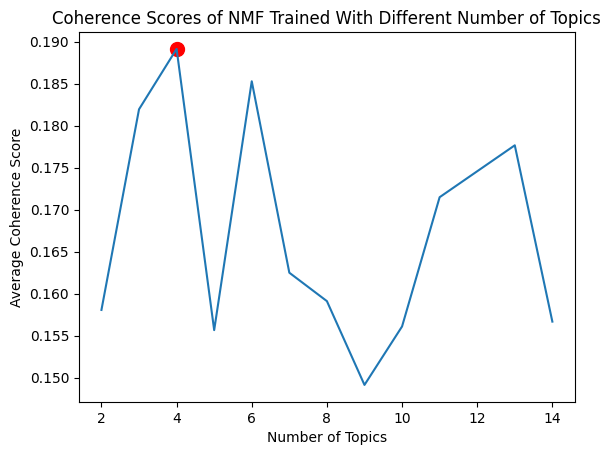

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.arange(2,15), scores)
plt.xlabel('Number of Topics')
plt.ylabel('Average Coherence Score')
plt.title('Coherence Scores of NMF Trained With Different Number of Topics')
plt.scatter(best_model.n_components, scores[best_model.n_components -2], c='red', marker='o', s=100)